# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [3]:
import tensorflow as tf

## Get the dataset

In [4]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [6]:
# Pre processing 
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8000, 28, 28)
(8000,)
(2000, 28, 28)
(2000,)


## Visualize the dataset
Print some images with labels.

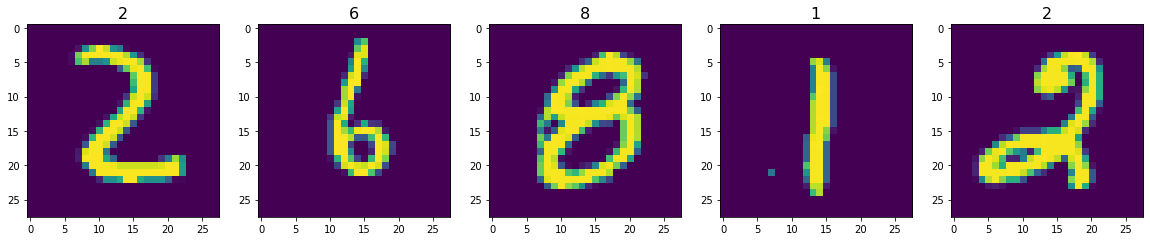

In [20]:
import matplotlib.pyplot as plt
num_classes =5
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  ax[i].imshow(X_train[i])
  ax[i].set_title(Y_train[i], fontsize=16)


Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

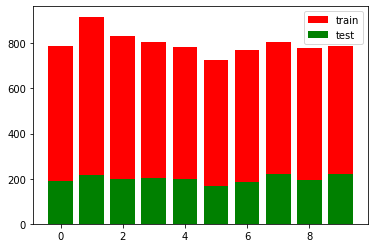

In [53]:
import numpy as np
unique1, counts1 = np.unique(Y_train, return_counts=True)
unique2, counts2 = np.unique(Y_test, return_counts=True)
plt.bar(unique1,counts1,color='r',label='train')
plt.bar(unique2,counts2,color='g',label='test')
plt.legend()
plt.show()
# Your code

## Model

In [9]:
# model building
import keras
from keras.models import Sequential
from keras import layers
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()
# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 256)        

In [11]:
# Compile the model (add optimizers and metrics)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, 
                    validation_split=0.33)

# Fit the model on the training data (specify validation_split, read about validation if new to you)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


168/168 [==============================] - 13s 8ms/step - loss: 1.8936 - accuracy: 0.8343 - val_loss: 0.1195 - val_accuracy: 0.9655
Epoch 2/10
168/168 [==============================] - 1s 6ms/step - loss: 0.0951 - accuracy: 0.9687 - val_loss: 0.1059 - val_accuracy: 0.9693
Epoch 3/10
168/168 [==============================] - 1s 6ms/step - loss: 0.0463 - accuracy: 0.9845 - val_loss: 0.1076 - val_accuracy: 0.9705
Epoch 4/10
168/168 [==============================] - 1s 6ms/step - loss: 0.0457 - accuracy: 0.9847 - val_loss: 0.0838 - val_accuracy: 0.9784
Epoch 5/10
168/168 [==============================] - 1s 6ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.1116 - val_accuracy: 0.9739
Epoch 6/10
168/168 [==============================] - 1s 5ms/step - loss: 0.0377 - accuracy: 0.9875 - val_loss: 0.1025 - val_accuracy: 0.9761
Epoch 7/10
168/168 [==============================] - 1s 6ms/step - loss: 0.0371 - accuracy: 0.9894 - val_loss: 0.1159 - val_accuracy: 0.9678
Epoch 8/10
168/1

## Predict some images
Print the image along with its label (true value) and predicted value.

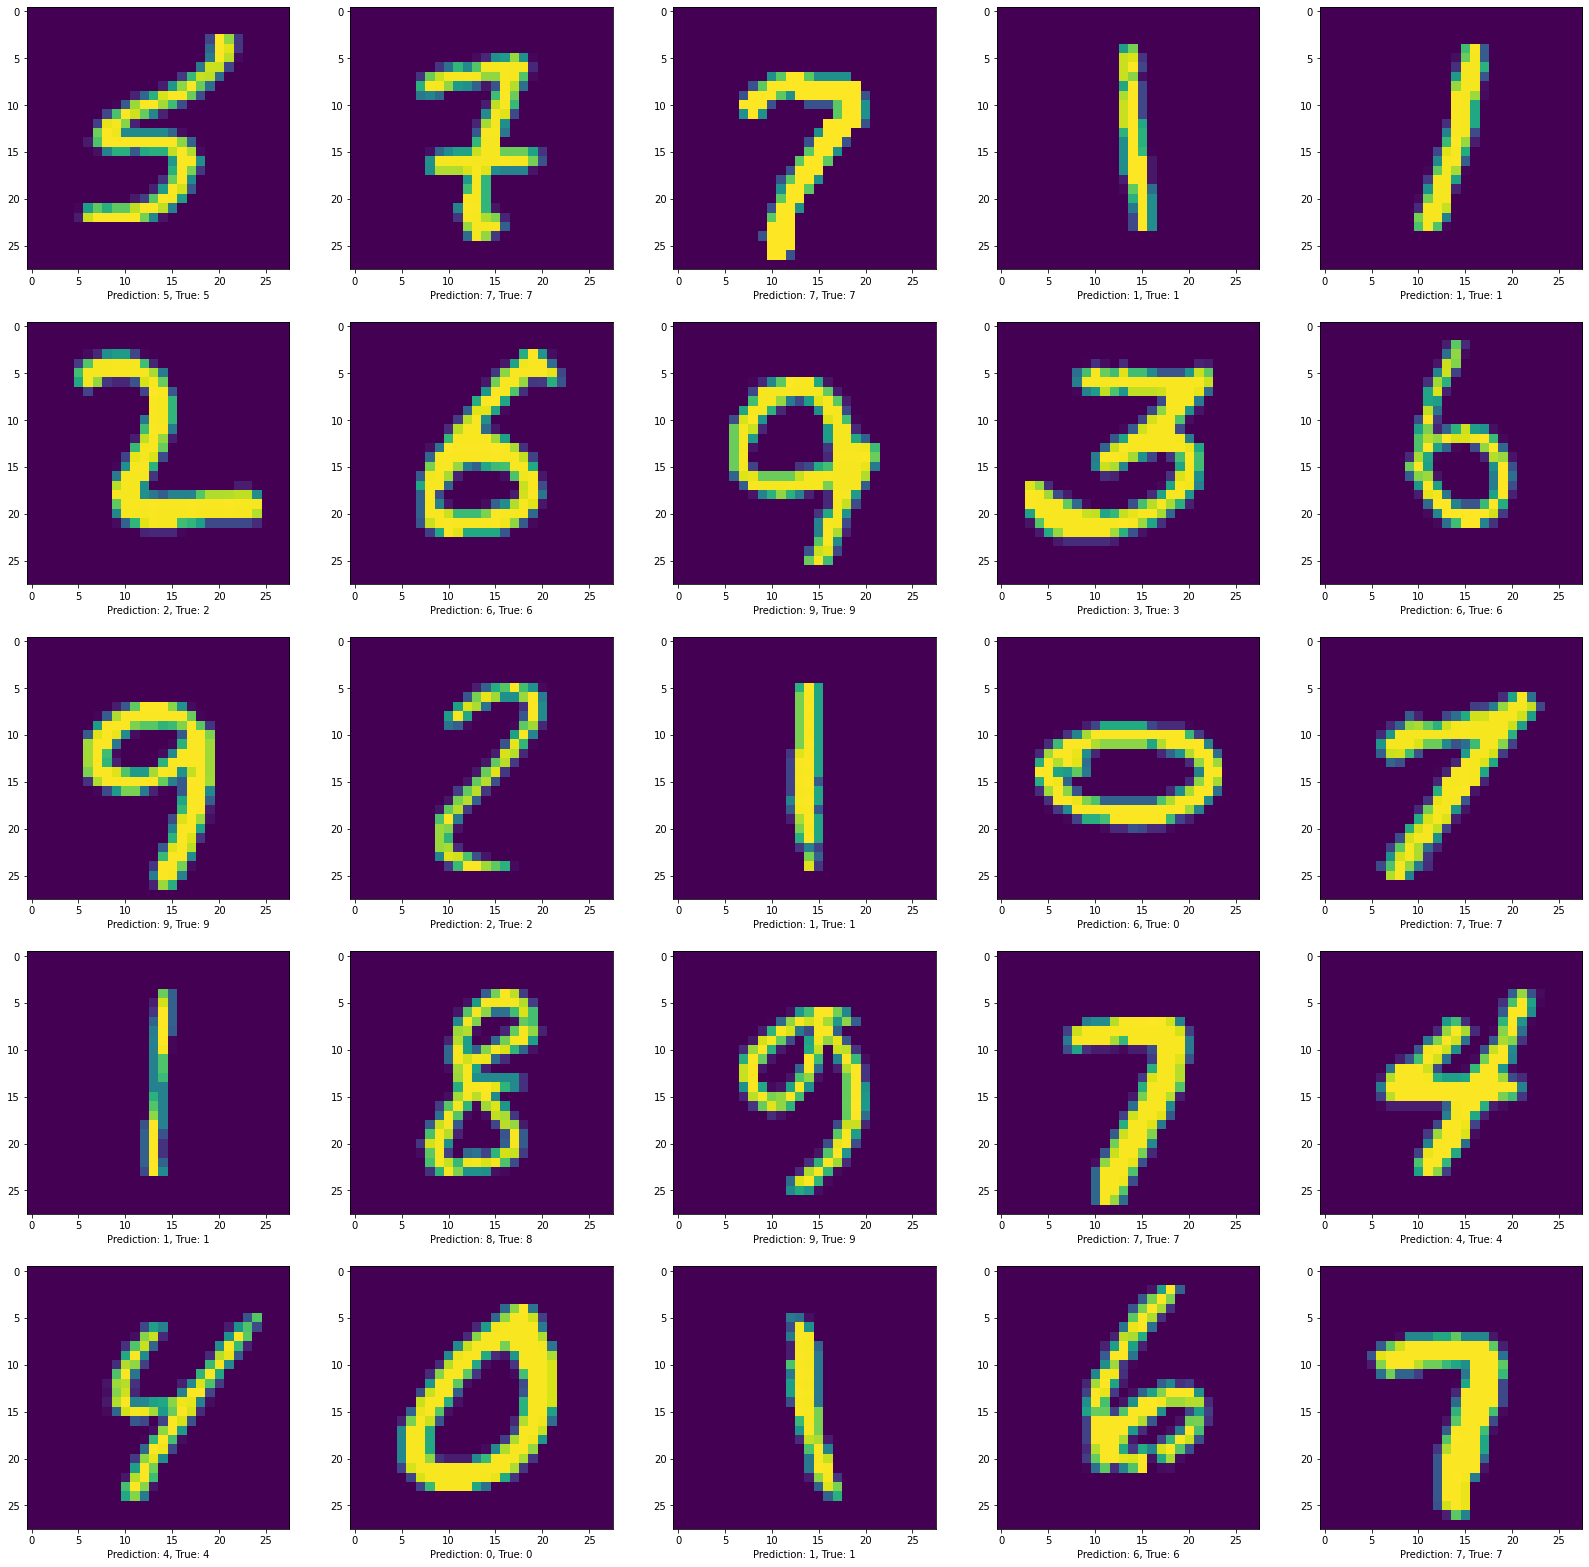

In [47]:
plt.figure(figsize=(28,28))
predictions=np.argmax(model.predict(X_test),axis=1)
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i])
  plt.xlabel("Prediction: {}, True: {}".format(predictions[i],Y_test[i]),fontsize=10)
plt.show()